# **1. bike 데이터셋 살펴보기**

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
bike_df = pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/4_머신러닝과 딥러닝/Data/bike.csv')

In [24]:
bike_df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,NaN,NaN,1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,NaN,90,Rain
33375,2021-08-31 20:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,NaN,90,Rain
33376,2021-08-31 21:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,NaN,NaN,90,Clouds
33377,2021-08-31 22:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,NaN,NaN,90,Clouds


In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


- datetime : 날짜
- count : 대여 개수
- holiday : 휴일
- workingday : 근무일
- temp : 기온
- feels_like : 체감온도
- temp_min : 최저기온
- temp_max : 최고기온
- pressure : 기압
- humidity : 습도
- wind_speed : 풍속
- wind_deg : 풍향
- rain_1h : 1시간당 내리는 비의 양
- snow_1h : 1시간당 내리는 눈의 양
- clouds_all : 구름의 양
- weather_main : 날씨

In [26]:
bike_df.describe()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,6771.000000,326.000000,33379.000000
mean,333.139788,0.030618,0.681327,15.213087,14.994843,13.532648,16.105542,1017.071602,67.818628,1.829340,174.022919,1.216475,0.641380,63.213997
std,336.519514,0.172283,0.465969,9.908964,11.176487,9.993094,9.984839,7.379420,18.422105,1.703747,113.844334,2.056222,0.571087,30.825936
min,0.000000,0.000000,0.000000,-12.790000,-18.910000,-15.140000,-12.290000,980.000000,14.000000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,59.000000,0.000000,0.000000,6.860000,5.880000,5.230000,7.730000,1012.000000,53.000000,0.450000,62.000000,0.250000,0.250000,40.000000
50%,236.000000,0.000000,1.000000,15.650000,15.020000,13.910000,16.590000,1017.000000,70.000000,1.340000,180.000000,0.530000,0.420000,75.000000
75%,495.000000,0.000000,1.000000,23.800000,24.140000,21.970000,24.390000,1022.000000,84.000000,2.600000,285.000000,1.300000,1.000000,90.000000
max,2038.000000,1.000000,1.000000,36.710000,43.710000,35.380000,38.810000,1044.000000,100.000000,16.980000,360.000000,54.050000,3.300000,100.000000


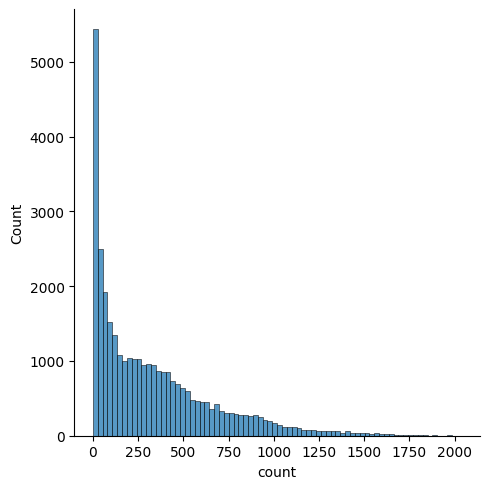

In [27]:
sns.displot(bike_df['count'])

<Axes: ylabel='count'>

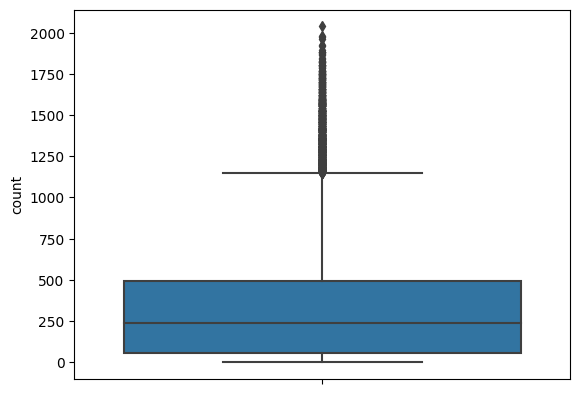

In [28]:
sns.boxplot(y=bike_df['count'])

<Axes: xlabel='feels_like', ylabel='count'>

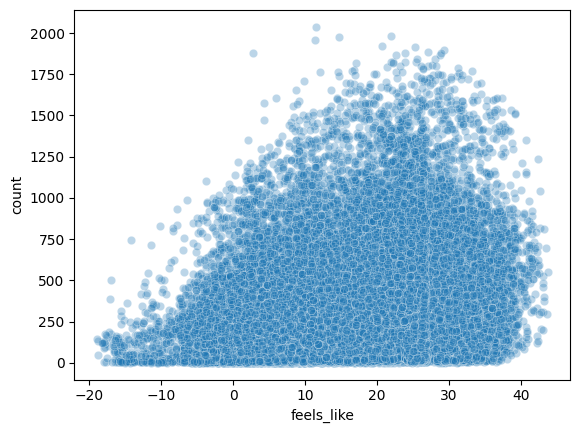

In [29]:
# 체감온도와 대여 개수가 연관이 있는지를 그래프를 그려서 확인해보자!
sns.scatterplot(x='feels_like', y='count', data = bike_df, alpha = 0.3)

<Axes: xlabel='pressure', ylabel='count'>

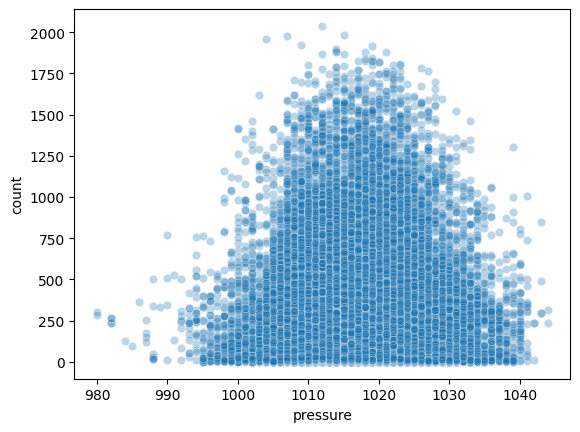

In [30]:
# 기압도 확인!
sns.scatterplot(x='pressure', y='count', data = bike_df, alpha = 0.3)

<Axes: xlabel='wind_speed', ylabel='count'>

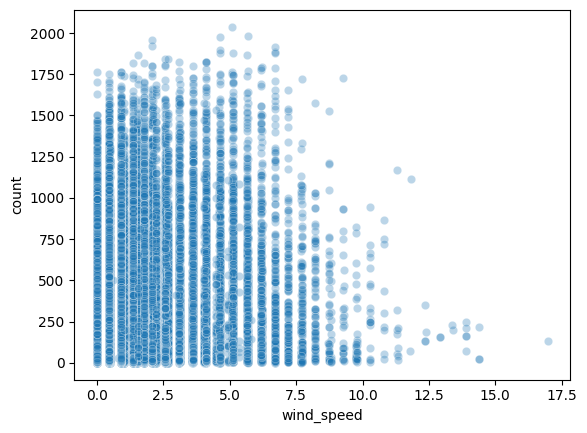

In [31]:
# 풍속도 확인!
sns.scatterplot(x='wind_speed', y='count', data = bike_df, alpha = 0.3)

In [32]:
# 결측치 확인
bike_df.isna().sum()

datetime            0
count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

In [33]:
bike_df.isna().mean()

datetime        0.000000
count           0.000000
holiday         0.000000
workingday      0.000000
temp            0.000000
feels_like      0.000000
temp_min        0.000000
temp_max        0.000000
pressure        0.000000
humidity        0.000000
wind_speed      0.000000
wind_deg        0.000000
rain_1h         0.797148
snow_1h         0.990233
clouds_all      0.000000
weather_main    0.000000
dtype: float64

In [34]:
# 눈, 비에 대한 결측값은 눈과 비가 안온 날이라고 볼 수 있다.
# 그렇기 때문 0을 채운다.
bike_df = bike_df.fillna(0)

In [35]:
# 결과 확인
bike_df.isna().mean()

datetime        0.0
count           0.0
holiday         0.0
workingday      0.0
temp            0.0
feels_like      0.0
temp_min        0.0
temp_max        0.0
pressure        0.0
humidity        0.0
wind_speed      0.0
wind_deg        0.0
rain_1h         0.0
snow_1h         0.0
clouds_all      0.0
weather_main    0.0
dtype: float64

In [36]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       33379 non-null  float64
 13  snow_1h       33379 non-null  float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [37]:
bike_df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,0.00,0.0,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,0.00,0.0,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,0.00,0.0,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,0.00,0.0,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,0.00,0.0,1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,0.0,90,Rain
33375,2021-08-31 20:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,0.0,90,Rain
33376,2021-08-31 21:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,0.00,0.0,90,Clouds
33377,2021-08-31 22:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,0.00,0.0,90,Clouds


In [38]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      33379 non-null  datetime64[ns]
 1   count         33379 non-null  int64         
 2   holiday       33379 non-null  int64         
 3   workingday    33379 non-null  int64         
 4   temp          33379 non-null  float64       
 5   feels_like    33379 non-null  float64       
 6   temp_min      33379 non-null  float64       
 7   temp_max      33379 non-null  float64       
 8   pressure      33379 non-null  int64         
 9   humidity      33379 non-null  int64         
 10  wind_speed    33379 non-null  float64       
 11  wind_deg      33379 non-null  int64         
 12  rain_1h       33379 non-null  float64       
 13  snow_1h       33379 non-null  float64       
 14  clouds_all    33379 non-null  int64         
 15  weather_main  33379 non-null  object

In [39]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,1,0
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,1
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,1,2
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,1,3
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,1,4


In [40]:
# 날짜
bike_df['date'] = bike_df['datetime'].dt.date
bike_df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour,date
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,0.00,0.0,20,Clouds,2018,1,0,2018-01-01
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,0.00,0.0,1,Clear,2018,1,1,2018-01-01
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,0.00,0.0,1,Clear,2018,1,2,2018-01-01
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,0.00,0.0,1,Clear,2018,1,3,2018-01-01
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,0.00,0.0,1,Clear,2018,1,4,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,0.0,90,Rain,2021,8,19,2021-08-31
33375,2021-08-31 20:00:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,0.0,90,Rain,2021,8,20,2021-08-31
33376,2021-08-31 21:00:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,0.00,0.0,90,Clouds,2021,8,21,2021-08-31
33377,2021-08-31 22:00:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,0.00,0.0,90,Clouds,2021,8,22,2021-08-31


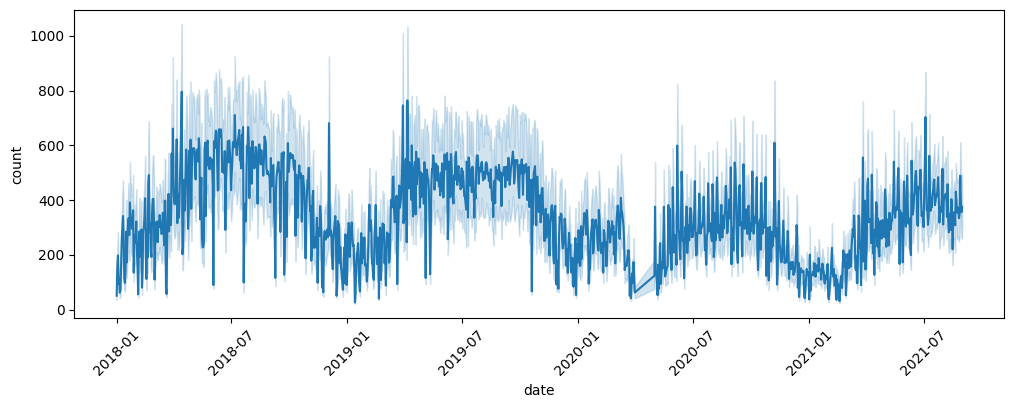

In [44]:
# line 그래프를 그려보자
plt.figure(figsize = (12, 4))
sns.lineplot(x='date', y='count', data = bike_df)
plt.xticks(rotation = 45)
plt.show()

In [45]:
bike_df[bike_df['year'] == 2019].groupby('month')['count'].mean()

month
1     193.368862
2     221.857718
3     326.564456
4     482.931694
5     438.027848
6     478.480053
7     472.745785
8     481.267366
9     500.862069
10    446.279070
11    307.295393
12    213.148886
Name: count, dtype: float64

In [46]:
# 2020년 4월 데이터가 없다.
bike_df[bike_df['year'] == 2020].groupby('month')['count'].mean()

month
1     260.445997
2     255.894320
3     217.135241
5     196.581064
6     290.900937
7     299.811688
8     331.528809
9     338.876478
10    293.640777
11    240.507324
12    138.993540
Name: count, dtype: float64

In [47]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      33379 non-null  datetime64[ns]
 1   count         33379 non-null  int64         
 2   holiday       33379 non-null  int64         
 3   workingday    33379 non-null  int64         
 4   temp          33379 non-null  float64       
 5   feels_like    33379 non-null  float64       
 6   temp_min      33379 non-null  float64       
 7   temp_max      33379 non-null  float64       
 8   pressure      33379 non-null  int64         
 9   humidity      33379 non-null  int64         
 10  wind_speed    33379 non-null  float64       
 11  wind_deg      33379 non-null  int64         
 12  rain_1h       33379 non-null  float64       
 13  snow_1h       33379 non-null  float64       
 14  clouds_all    33379 non-null  int64         
 15  weather_main  33379 non-null  object

In [50]:
# covid
# 2020-04-01 이전 : precovid
# 2020-04-01 이후 ~ 2021-04-01 이전 : covid
# 2021-04-01 이후 : postcovid
# bike_df['covid]
def covid(date):
  if str(date) < '2020-04-01':
    return 'precovid'
  elif str(date) < '2021-04-01':
    return 'covid'
  else :
    return 'postcovid'

In [51]:
bike_df['date'].apply(covid)

0         precovid
1         precovid
2         precovid
3         precovid
4         precovid
           ...    
33374    postcovid
33375    postcovid
33376    postcovid
33377    postcovid
33378    postcovid
Name: date, Length: 33379, dtype: object

In [53]:
# 함수는 메모리에 계속 남게 되니, 람다식을 이용하자!
bike_df['covid'] = bike_df['date'].apply(lambda date : 'precovid' if str(date) < '2020-04-01' else 'covid' if str(date) < '2021-04-01' else 'postcovid')

In [54]:
bike_df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,...,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour,date,covid
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,...,310,0.00,0.0,20,Clouds,2018,1,0,2018-01-01,precovid
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,...,310,0.00,0.0,1,Clear,2018,1,1,2018-01-01,precovid
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,...,310,0.00,0.0,1,Clear,2018,1,2,2018-01-01,precovid
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,...,310,0.00,0.0,1,Clear,2018,1,3,2018-01-01,precovid
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,...,330,0.00,0.0,1,Clear,2018,1,4,2018-01-01,precovid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,...,339,1.00,0.0,90,Rain,2021,8,19,2021-08-31,postcovid
33375,2021-08-31 20:00:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,...,347,0.25,0.0,90,Rain,2021,8,20,2021-08-31,postcovid
33376,2021-08-31 21:00:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,...,327,0.00,0.0,90,Clouds,2021,8,21,2021-08-31,postcovid
33377,2021-08-31 22:00:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,...,60,0.00,0.0,90,Clouds,2021,8,22,2021-08-31,postcovid


In [58]:
# 문제!
# bike_df['season']
# 3월 ~ 5월 : spring
# 6월 ~ 8월 : summer
# 9월 ~ 11월 : fall
# 12월 ~ 2월 : winter
bike_df['season'] = bike_df['month'].apply(lambda x : 'winter' if x == 12 else 'fall' if x >= 9 else 'summer' if x >= 6 else 'spring' if x >= 3 else 'winter')

In [60]:
bike_df[['month', 'season']]

,month,season
0,1,winter
1,1,winter
2,1,winter
3,1,winter
4,1,winter
...,...,...
33374,8,summer
33375,8,summer
33376,8,summer
33377,8,summer


In [61]:
# 시간도 아침에 많이 빌릴지... 그런 것도 해보자!
bike_df['day_night'] = bike_df['hour'].apply(lambda x: 'night' if x >= 21 else 'late evening' if x >= 19 else 'early evening' if x >= 17 else 'late afternoon' if x >= 16 else 'early afternoon' if x >= 13 else 'late morning' if x >= 11 else 'early morning' if x >= 5 else 'night')

In [62]:
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,...,snow_1h,clouds_all,weather_main,year,month,hour,date,covid,season,day_night
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,...,0.0,20,Clouds,2018,1,0,2018-01-01,precovid,winter,night
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,...,0.0,1,Clear,2018,1,1,2018-01-01,precovid,winter,night
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,...,0.0,1,Clear,2018,1,2,2018-01-01,precovid,winter,night
3,2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,...,0.0,1,Clear,2018,1,3,2018-01-01,precovid,winter,night
4,2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,...,0.0,1,Clear,2018,1,4,2018-01-01,precovid,winter,night


In [63]:
# 파생 변수를 만들 때 썼던 친구들을 drop
bike_df.drop(['datetime', 'date', 'month', 'hour'], axis = 1, inplace = True)

In [64]:
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,precovid,winter,night
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,precovid,winter,night
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,precovid,winter,night


In [65]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   count         33379 non-null  int64  
 1   holiday       33379 non-null  int64  
 2   workingday    33379 non-null  int64  
 3   temp          33379 non-null  float64
 4   feels_like    33379 non-null  float64
 5   temp_min      33379 non-null  float64
 6   temp_max      33379 non-null  float64
 7   pressure      33379 non-null  int64  
 8   humidity      33379 non-null  int64  
 9   wind_speed    33379 non-null  float64
 10  wind_deg      33379 non-null  int64  
 11  rain_1h       33379 non-null  float64
 12  snow_1h       33379 non-null  float64
 13  clouds_all    33379 non-null  int64  
 14  weather_main  33379 non-null  object 
 15  year          33379 non-null  int64  
 16  covid         33379 non-null  object 
 17  season        33379 non-null  object 
 18  day_night     33379 non-nu

In [68]:
# 원 핫 인코딩 진행에 앞서, 값의 갯수를 먼저 알아보겠습니다.
for i in ['weather_main', 'covid', 'season', 'day_night']:
  print(i, bike_df[i].nunique())

weather_main 11
covid 3
season 4
day_night 7


In [69]:
bike_df['weather_main'].unique()

array(['Clouds', 'Clear', 'Snow', 'Mist', 'Rain', 'Fog', 'Drizzle',
       'Haze', 'Thunderstorm', 'Smoke', 'Squall'], dtype=object)

In [70]:
# 원 핫 인코딩 진행
bike_df = pd.get_dummies(bike_df, columns = ['weather_main', 'covid', 'season', 'day_night'])

In [71]:
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,season_spring,season_summer,season_winter,day_night_early afternoon,day_night_early evening,day_night_early morning,day_night_late afternoon,day_night_late evening,day_night_late morning,day_night_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,...,0,0,1,0,0,0,0,0,0,1
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,...,0,0,1,0,0,0,0,0,0,1
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,...,0,0,1,0,0,0,0,0,0,1
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,...,0,0,1,0,0,0,0,0,0,1


In [72]:
# 컬럼 갯수가 너무 많아 생략되는 부분이 있다.
# max_columns 를 수정하겠습니다.
pd.set_option('display.max_columns', 50)

In [73]:
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,covid_covid,covid_postcovid,covid_precovid,season_fall,season_spring,season_summer,season_winter,day_night_early afternoon,day_night_early evening,day_night_early morning,day_night_late afternoon,day_night_late evening,day_night_late morning,day_night_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(bike_df.drop('count', axis = 1), bike_df['count'], test_size = 0.2, random_state = 2023)

# **2. 의사 결정 나무(Decision Tree)**
- 데이터를 분류하거나 예측하기 위한 간단하고 직관적인 머신러닝 알고리즘
- 지니계수(Gini index) : 불순도를 측정하는 지표
- 엔트로피(Entropy) : 불확실성 혹은 무질서의 정도를 측정하는 지표
- 오버피팅(과적합) : 학습데이터에서는 정확하나 테스트데이터에서는 성과가 나쁜 현상을 말함. 의사 결정 나무는 오버피팅이 매우 잘 일어남
  - 오버피팅을 방지하는 방법
    - 사전 가지치기 : 나무가 다 자리기 전에 알고리즘을 멈추는 방법
    - 사후 가지치기 : 나무를 끝까지 돌린 후 밑에서부터 가지를 쳐나가는 방법


In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dt = DecisionTreeRegressor(random_state = 2023)

In [80]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2023)

In [82]:
pred1 = dt.predict(X_test)

<Axes: xlabel='count'>

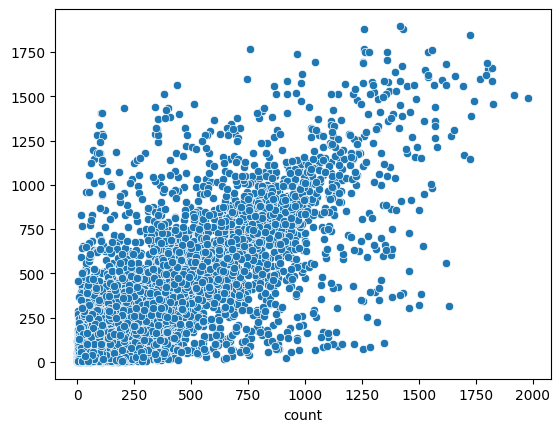

In [83]:
sns.scatterplot(x=y_test, y=pred1) # 정답이 x축, y가 예측

In [84]:
# 평가 지표
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_test, pred1, squared = False)

222.90547303762153

# **3. 선형 회귀 vs 의사 결정 나무**

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [88]:
lr. fit(X_train, y_train)

LinearRegression()

In [89]:
pred2 = lr.predict(X_test)

<Axes: xlabel='count'>

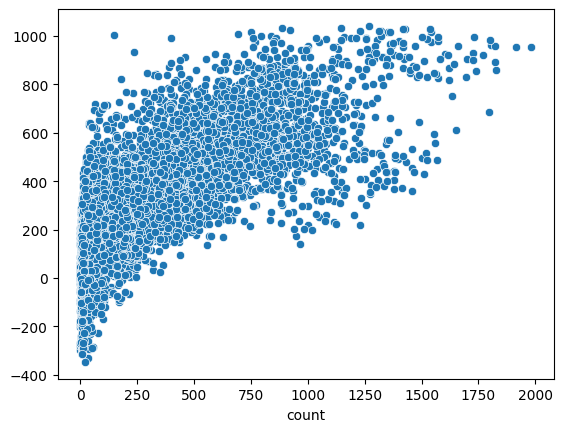

In [90]:
sns.scatterplot(x=y_test, y=pred2)

In [91]:
mean_squared_error(y_test, pred2, squared = False)

224.5257704711731

In [96]:
# 하이퍼 파라미터 적용
# max_depth : 최대 깊이 설정
# min_samples_leaf : 30개 미만이라면 분할하지 않는다.
dt = DecisionTreeRegressor(random_state=2023, max_depth=50, min_samples_leaf=30)

In [97]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=30, random_state=2023)

In [98]:
pred3 = dt.predict(X_test)

In [99]:
mean_squared_error(y_test, pred3, squared = False)

186.56448037541028

In [100]:
# 의사 결정 나무가 어떻게 동작되는지 그래프로 그려보자!
from sklearn.tree import plot_tree

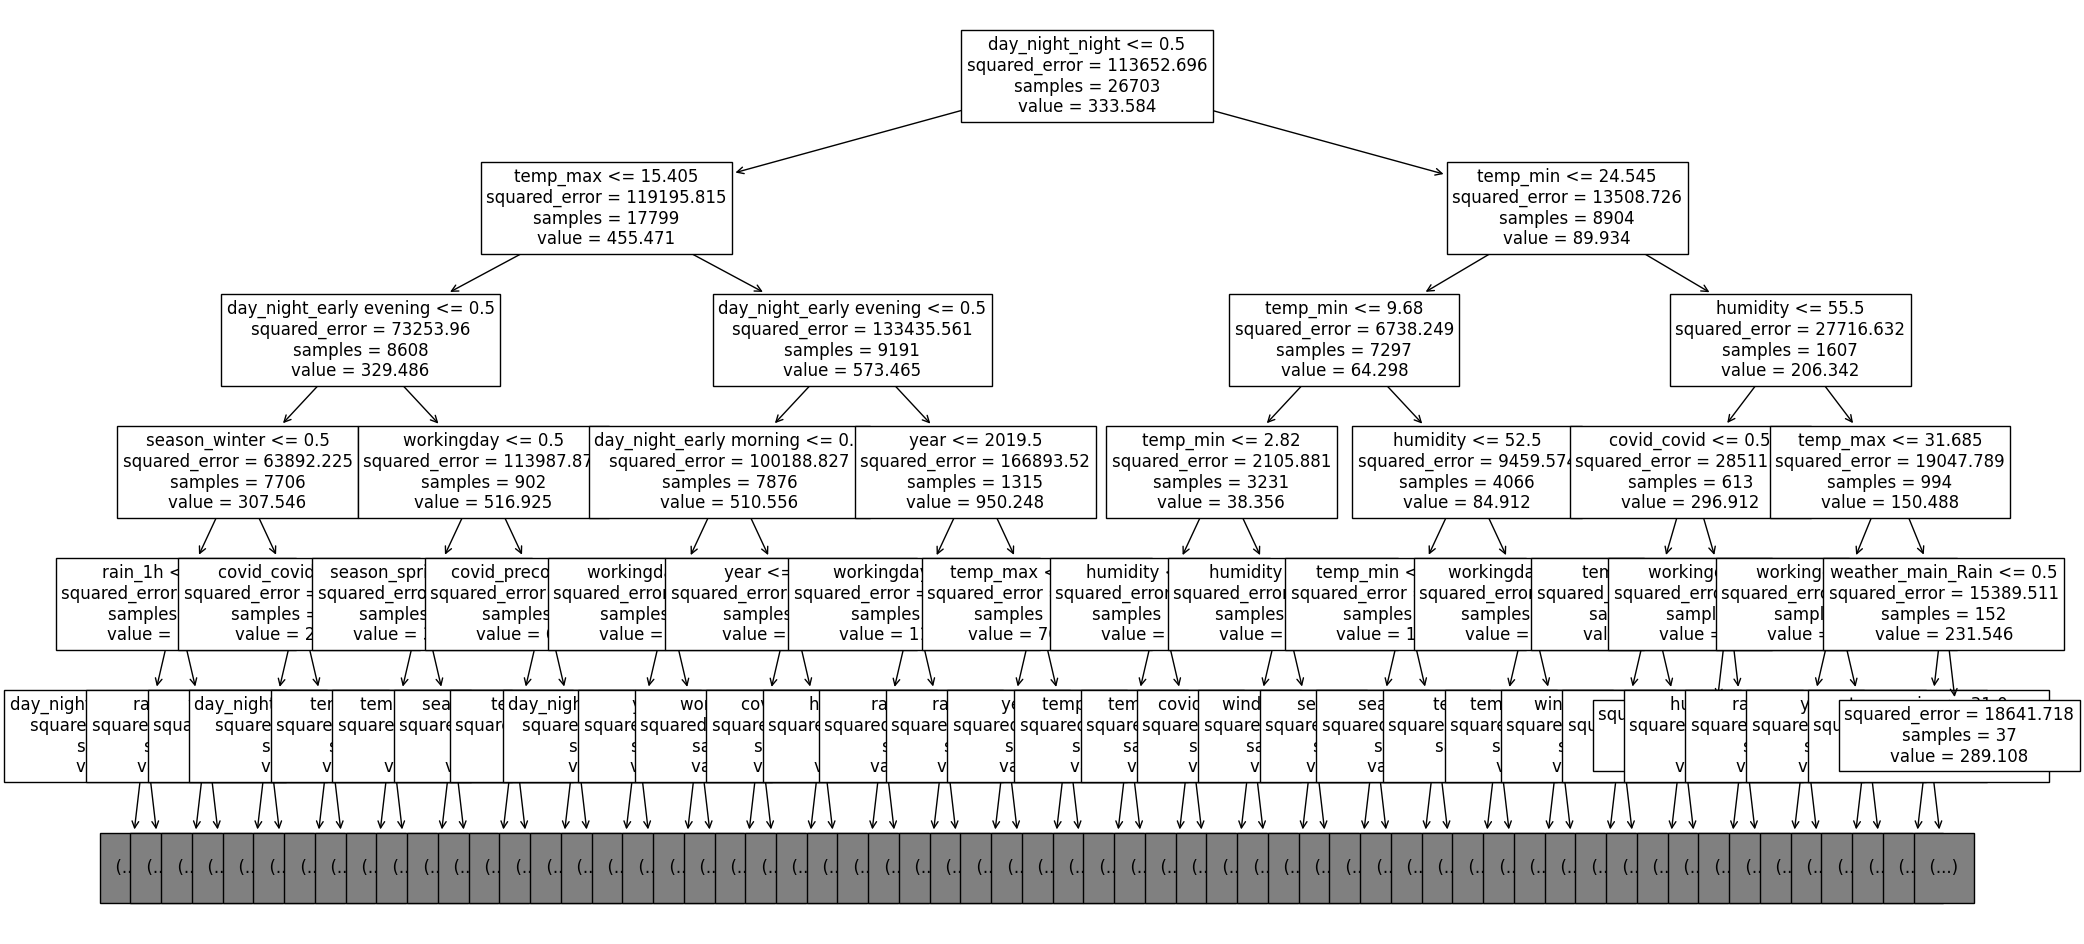

In [104]:
plt.figure(figsize = (24, 12))
plot_tree(dt, max_depth=5, fontsize = 12, feature_names=X_train.columns)
plt.show()

In [105]:
bike_df

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,covid_covid,covid_postcovid,covid_precovid,season_fall,season_spring,season_summer,season_winter,day_night_early afternoon,day_night_early evening,day_night_early morning,day_night_late afternoon,day_night_late evening,day_night_late morning,day_night_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,0.00,0.0,20,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,0.00,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,0.00,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,0.00,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,0.00,0.0,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,0.0,90,2021,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
33375,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,0.0,90,2021,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
33376,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,0.00,0.0,90,2021,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
33377,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,0.00,0.0,90,2021,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
